In [19]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
'''
img = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)
ret,thr = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
thr = cv2.bitwise_not(thr)

thr_0 = thr[:500]
print(img.shape)

#contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)





#img = cv2.drawContours(img, contours, 0, (200,0,0), 10)
plt.imshow(thr_0)
x = contours[0]
x = np.reshape(x,(-1,2))
'''

"\nimg = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)\nret,thr = cv2.threshold(img,127,255,cv2.THRESH_BINARY)\nthr = cv2.bitwise_not(thr)\n\nthr_0 = thr[:500]\nprint(img.shape)\n\n#contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)\n\n\n\n\n\n#img = cv2.drawContours(img, contours, 0, (200,0,0), 10)\nplt.imshow(thr_0)\nx = contours[0]\nx = np.reshape(x,(-1,2))\n"

AttributeError: 'tuple' object has no attribute 'shape'

In [74]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt


from pop import Util,Pilot
Car=Pilot.AutoCar()
Car.camPan(98)
Car.camTilt(-15)
Util.enable_imshow()

cam = Util.gstrmer(width=640,height=480)
cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
camera_matrix_file="intrinsic_parameters/camera_matrix.npy"
dist_coeffs_file = "intrinsic_parameters/distortion_coefficients.npy"

camera_matrix=np.load(camera_matrix_file)
dist_coeffs=np.load(dist_coeffs_file)


#-------------------------------------------------------------------------#


def Get_center(img,height_range:tuple , width_range = (320 - 200 , 320 + 200) , min_contour_area = 100 ):
    
    # get cam center
    cam_cx,cam_cy = int ((width_range[0] + width_range[1]) / 2) , int ((height_range[0] + height_range[1]) / 2)
    
    # convert image by bitwise
    crop_img  = img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    ret, thr_img = cv2.threshold( gray_img , 127 , 255 , cv2.THRESH_BINARY )
    thr_img = cv2.bitwise_not ( thr_img )
    
    # get contours
    contours , hierarchy = cv2.findContours(thr_img , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    
    # IF No contour
    if(len(contours) == 0 ) :  return cam_cx, cam_cy ,  cam_cx , cam_cy
    
    # IF Too small contour area
    c = max(contours , key = cv2.contourArea)
    M = cv2.moments(c)
    if( M['m00'] < min_contour_area ): return cam_cx, cam_cy ,  cam_cx , cam_cy
    
    
    # get center
    cx = int(M['m10']/M['m00']) + width_range[0] 
    cy = int(M['m01']/M['m00']) + height_range[0]

    # draw
    cv2.drawContours(crop_img, contours, -1, (255,0,0), 3)
    cv2.circle(img, (cx,cy), 1,(255,0,0) ,5)
    cv2.circle(img, (cam_cx,cam_cy), 1,(0,0,255) ,5)
    
    #print( cam_cx, cam_cy , cx , cy ) ; print( M['m00'] )  ; print(len(contours ))
    return cam_cx, cam_cy , cx , cy



#-------------------------------------------------------------------------#
prior_error =0; I =0
def Get_pid_value(error, Kp , Ki , Kd):  
    global prior_error, I
    P = error 
    I = I+error 
    D = error - prior_error
    
    pid_value = P*Kp + I*Ki + D*Kd
    
    prior_error = error
    return pid_value / -200
    
#-------------------------------------------------------------------------#
while True:
    
    ret, img =cap.read() ; img=cv2.undistort(img,camera_matrix,dist_coeffs)

    cam_cx1 , cam_cy1 , contour_cx1 , contour_cy1 = Get_center(img ,height_range = (180,280))
    cam_cx2 , cam_cy2 , contour_cx2 , contour_cy2 = Get_center(img ,height_range = (280,380))
    cam_cx3 , cam_cy3 , contour_cx3 , contour_cy3 = Get_center(img ,height_range = (380,480))
    
    cv2.putText(img, str(cam_cx1 - contour_cx1) , (cam_cx1,cam_cy1),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
    cv2.putText(img, str(cam_cx2 - contour_cx2) , (cam_cx2,cam_cy2),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
    cv2.putText(img, str(cam_cx3 - contour_cx3) , (cam_cx3,cam_cy3),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)

    error1 = cam_cx1 - contour_cx1
    error2 = cam_cx2 - contour_cx2
    error3 = cam_cx3 - contour_cx3
    error = 0.5* error3 + 0.3*error2 + 0.2*error1
    pid_value = Get_pid_value(error,1,0,0)
    
    
    #Car.steering=pid_value
    #Car.forward(40)
    
    
    cv2.imshow('img', img)    
    
#-------------------------------------------------------------------------#
cap.release()
cv2.destroyAllWindows()

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

KeyboardInterrupt: 

In [12]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from pop import Util,Pilot





Util.enable_imshow()
cam = Util.gstrmer(width=640,height=480)
cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
#----

print(cv2.CAP_PROP_POS_FRAMES)



#---
camera_matrix_file="intrinsic_parameters/camera_matrix.npy"
dist_coeffs_file = "intrinsic_parameters/distortion_coefficients.npy"
camera_matrix=np.load(camera_matrix_file)
dist_coeffs=np.load(dist_coeffs_file)







#cap.set(cv2.CAP_PROP_POS_FRAMES,0)
ret, img =cap.read() 
cv2.imshow('g',img)


1


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [31]:
ret, img =cap.read() 
cv2.imshow('g',img)
print ( cap.get(cv2.CAP_PROP_BUFFERSIZE) ) 

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

0.0


In [18]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from pop import Util,Pilot




Car=Pilot.AutoCar()
Car.camPan(98)
Car.camTilt(-15)
Util.enable_imshow()

cam = Util.gstrmer(width=640,height=480)
cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
camera_matrix_file="intrinsic_parameters/camera_matrix.npy"
dist_coeffs_file = "intrinsic_parameters/distortion_coefficients.npy"



camera_matrix=np.load(camera_matrix_file)
dist_coeffs=np.load(dist_coeffs_file)




In [ ]:
#most fur
w1= 1.5
w2= 1.5
w3= 0.7
Kp=1
Ki=0 
Kd=0



def Get_range_value(value):
    if(value>1):return 1
    elif(value<-1):return -1
    return value

def Get_error(img, cam_cx , cam_cy , contour_cx , contour_cy ):
    #height = 480 - contour_cy 
    error = ( ( contour_cx - cam_cx   ) / 320 )
    cv2.putText(img, str("%.2f"%error) , (cam_cx,cam_cy),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3 )
                
    return error
def Preprocesing( img ):

    # PreProcessing----------------------------------------------------------
    
    # HSV image 
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    
    # Normalization
    #img_hsv[:,:,1]  = cv2.normalize(img_hsv[:,:,1],None, 0, 255, cv2.NORM_MINMAX)
    #img_hsv[:,:,2]  = cv2.normalize(img_hsv[:,:,2],None, 0, 255, cv2.NORM_MINMAX)
    
    # bitwise 
    lower_green = (85, 40 , 40)
    upper_green =  (130, 255, 255)
    img_mask = cv2.inRange( img_hsv  , lower_green, upper_green)
    
    # blur
    
    # erode + dilat
    #cv2.imshow('img',img_mask)
    
    '''
    kernel = np.ones((9,9) , np.uint8)
    openin_img = cv2.morphologyEx(img_mask, cv2.MORPH_OPEN, kernel)
    '''
    
    kernel = np.ones((8,8) , np.uint8)
    img_erode  = cv2.erode(img_mask, kernel)
    kernel = np.ones((11,11) , np.uint8)
    img_dilat = cv2.dilate(img_erode, kernel)
    
    
    
    
    return img_dilat
    
    
    
#-------------------------------------------------------------------------#


    
def Get_center(img,processed_img,height_range:tuple , width_range = (320 - 320 , 320 + 320) , min_contour_area = 100 ):

    # get cam center
    cam_cx,cam_cy = int ((width_range[0] + width_range[1]) / 2) , int ((height_range[0] + height_range[1]) / 2)
    
    # Crops image
    crop_img  = img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    corp_processed_img = processed_img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    
    # Get conotur
    contours , hierarchy = cv2.findContours(corp_processed_img , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    # IF NO contour 
    if(len(contours) == 0 ) :  return cam_cx, cam_cy ,  cam_cx , cam_cy , False
    # Get approx contour
    c = max(contours , key = cv2.contourArea)
    peri = cv2.arcLength(c, True)
    approx = np.array( cv2.approxPolyDP(c, peri * 0.005 , True) )
    M = cv2.moments(approx)
    # IF TOO small contour area 
    if( M['m00'] < min_contour_area ): return cam_cx, cam_cy ,  cam_cx , cam_cy , False
    

    
    
    
    # get center
    cx = int(M['m10']/M['m00']) + width_range[0] 
    cy = int(M['m01']/M['m00']) + height_range[0]

    # draw
    cv2.drawContours(crop_img, [approx] , -1, (255,0,0), 3)
    cv2.circle(img, (cx,cy), 1,(255,0,0) ,5)
    cv2.circle(img, (cam_cx,cam_cy), 1,(0,0,255) ,5)
    
    
    return cam_cx, cam_cy , cx , cy , True




#-------------------------------------------------------------------------#
prior_error =0; I =0
def Get_pid_value(error, Kp , Ki , Kd):  
    global prior_error, I
    P = error 
    I = I+error 
    D = error - prior_error
    
    pid_value = Get_range_value ( P*Kp + I*Ki + D*Kd )
    prior_error = error
    
    
    
    
    return pid_value
    
#-------------------------------------------------------------------------#

Car.forward(99)

frame = 0 ; pid_value = 0
while True:
    
    ret, img =cap.read() ; img=cv2.undistort(img,camera_matrix,dist_coeffs)
    preprosed_img = Preprocesing( img )
    frame += 1 ; check = 0 ;  error = 0 
    


    cam_cx1 , cam_cy1 , contour_cx1 , contour_cy1 , check1 = Get_center(img ,preprosed_img,height_range = (80,180))
    cam_cx2 , cam_cy2 , contour_cx2 , contour_cy2 , check2 = Get_center(img ,preprosed_img,height_range = (180,280))
    cam_cx3 , cam_cy3 , contour_cx3 , contour_cy3 , check3 = Get_center(img ,preprosed_img,height_range = (280,380))
    
   
    if(check1) : error = error + Get_error(img,cam_cx1 , cam_cy1 , contour_cx1 , contour_cy1 )  *w1  ; check += 1 
    if(check2) : error = error + Get_error(img,cam_cx2 , cam_cy2 , contour_cx2 , contour_cy2 )  *w2  ; check += 1
    if(check3) : error = error + Get_error(img,cam_cx3 , cam_cy3 , contour_cx3 , contour_cy3 )  *w3  ; check += 1
    
                
                

    if(frame%10 == 0):
        if(check > 0) : 
            pid_value = Get_pid_value(error/check,Kp , Ki , Kd)
            Car.steering=pid_value
            #cap.release()
            #cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
    cv2.putText(img, str("PID : %.2f"%pid_value) , (30,30),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3 )

    cv2.imshow('img',img)
        
            
#-------------------------------------------------------------------------#

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [16]:
cap.release()
cv2.destroyAllWindows()
Car.stop()

In [9]:
cam = Util.gstrmer(width=640,height=480)
cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
camera_matrix_file="intrinsic_parameters/camera_matrix.npy"
dist_coeffs_file = "intrinsic_parameters/distortion_coefficients.npy"



camera_matrix=np.load(camera_matrix_file)
dist_coeffs=np.load(dist_coeffs_file)


In [19]:
while True:

    ret, img =cap.read() ; img=cv2.undistort(img,camera_matrix,dist_coeffs)

        

    print('a',end=' ')
    cv2.imshow('img',img)
    
    Car.stop()





a 

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a 

KeyboardInterrupt: 

In [7]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt


from pop import Util,Pilot
Car=Pilot.AutoCar()
Car.camPan(98)
Car.camTilt(-15)
Util.enable_imshow()

cam = Util.gstrmer(width=640,height=480)
cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
camera_matrix_file="intrinsic_parameters/camera_matrix.npy"
dist_coeffs_file = "intrinsic_parameters/distortion_coefficients.npy"

camera_matrix=np.load(camera_matrix_file)
dist_coeffs=np.load(dist_coeffs_file)


#-------------------------------------------------------------------------#

def Preprocesing( img ):

    # PreProcessing----------------------------------------------------------
    
    # HSV image 
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    
    # Normalization
    #img_hsv[:,:,1]  = cv2.normalize(img_hsv[:,:,1],None, 0, 255, cv2.NORM_MINMAX)
    #img_hsv[:,:,2]  = cv2.normalize(img_hsv[:,:,2],None, 0, 255, cv2.NORM_MINMAX)

    # bitwise 
    lower_green = (85, 30 , 30)
    upper_green =  (130, 255, 255)
    img_mask = cv2.inRange( img_hsv  , lower_green, upper_green)
    
    # blur
    
    # erode + dilat
    '''
    kernel = np.ones((11,11) , np.uint8)
    openin_img = cv2.morphologyEx(img_mask, cv2.MORPH_OPEN, kernel)
    '''
    
    kernel = np.ones((11,11) , np.uint8)
    img_erode  = cv2.erode(img_mask, kernel)
    kernel = np.ones((13,13) , np.uint8)
    img_dilat = cv2.dilate(img_erode, kernel)
    
    return img_dilat
    
    
    
    
def Get_center(img,processed_img,height_range:tuple , width_range = (320 - 320 , 320 + 320) , min_contour_area = 100 ):

    # get cam center
    cam_cx,cam_cy = int ((width_range[0] + width_range[1]) / 2) , int ((height_range[0] + height_range[1]) / 2)
    
    # Crops image
    crop_img  = img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    corp_processed_img = processed_img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    
    # Get conotur
    contours , hierarchy = cv2.findContours(corp_processed_img , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    # IF NO contour 
    if(len(contours) == 0 ) :  return cam_cx, cam_cy ,  cam_cx , cam_cy , False
    # Get approx contour
    c = max(contours , key = cv2.contourArea)
    peri = cv2.arcLength(c, True)
    approx = np.array( cv2.approxPolyDP(c, peri * 0.005 , True) )
    M = cv2.moments(approx)
    # IF TOO small contour area 
    if( M['m00'] < min_contour_area ): return cam_cx, cam_cy ,  cam_cx , cam_cy , False
    

    
    
    
    # get center
    cx = int(M['m10']/M['m00']) + width_range[0] 
    cy = int(M['m01']/M['m00']) + height_range[0]

    # draw
    cv2.drawContours(crop_img, [approx] , -1, (255,0,0), 3)
    cv2.circle(img, (cx,cy), 1,(255,0,0) ,5)
    cv2.circle(img, (cam_cx,cam_cy), 1,(0,0,255) ,5)
    
    
    return cam_cx, cam_cy , cx , cy , True


#-------------------------------------------------------------------------#
prior_error =0; I =0
def Get_pid_value(error, Kp , Ki , Kd,check):  
    global prior_error, I
    P = error 
    I = I+error 
    D = error - prior_error
    
    pid_value = P*Kp + I*Ki + D*Kd
    
    prior_error = error
    value = pid_value / -200 * check
    if(value > 1): return 1
    elif(value < -1): return -1
    else: return value
    
#-------------------------------------------------------------------------#
frame = 0
while True:
    
    ret, img =cap.read() ; img=cv2.undistort(img,camera_matrix,dist_coeffs)
    
    cam_cx0 , cam_cy0 , contour_cx0 , contour_cy0, check0 = Get_center(img ,height_range = (0,180))
    cam_cx1 , cam_cy1 , contour_cx1 , contour_cy1 , check1 = Get_center(img ,height_range = (180,280))
    cam_cx2 , cam_cy2 , contour_cx2 , contour_cy2 , check2 = Get_center(img ,height_range = (280,380))
    cam_cx3 , cam_cy3 , contour_cx3 , contour_cy3 , check3 = Get_center(img ,height_range = (380,480))
    check = 0
        
    if(check0) : cv2.putText(img, str(cam_cx0 - contour_cx0) , (cam_cx0,cam_cy0),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3); check += 1
    if(check1) : cv2.putText(img, str(cam_cx1 - contour_cx1) , (cam_cx1,cam_cy1),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3); check += 1
    if(check2) : cv2.putText(img, str(cam_cx2 - contour_cx2) , (cam_cx2,cam_cy2),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3); check += 1
    if(check3) : cv2.putText(img, str(cam_cx3 - contour_cx3) , (cam_cx3,cam_cy3),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3); check += 1
                
    error0 = cam_cx0 - contour_cx0
    error1 = cam_cx1 - contour_cx1
    error2 = cam_cx2 - contour_cx2
    error3 = cam_cx3 - contour_cx3 
        
    error = (0.1* error3 + 0.2*error2 + 0.3*error1 +0.4*error0) / check
    pid_value = Get_pid_value(error,1,0,0,check)
    Car.steering=pid_value
    SPEED = 20
    car_speed = check * SPEED
    Car.forward(car_speed)
    
    cv2.imshow('img', img)
#-------------------------------------------------------------------------#

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.2.0) /home/soda/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [106]:
cap.release()
cv2.destroyAllWindows()
import cv2
import numpy as np

import time
from matplotlib import pyplot as plt


from pop import Util,Pilot
Car=Pilot.AutoCar()
Car.stop()

In [105]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from pop import Util,Pilot




Car=Pilot.AutoCar()
Car.camPan(98)
Car.camTilt(-15)
#Util.enable_imshow()

cam = Util.gstrmer(width=640,height=480)
cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
camera_matrix_file="intrinsic_parameters/camera_matrix.npy"
dist_coeffs_file = "intrinsic_parameters/distortion_coefficients.npy"



camera_matrix=np.load(camera_matrix_file)
dist_coeffs=np.load(dist_coeffs_file)


#most fur
w1= 2.5
w2= 1.0
w3= 0.5
Kp=0.8
Ki=0 
Kd=0.4



def Get_range_value(value):
    if(value>1):return 1
    elif(value<-1):return -1
    return value

def Get_error(img, cam_cx , cam_cy , contour_cx , contour_cy ):
    #height = 480 - contour_cy 
    error = ( ( contour_cx - cam_cx   ) / 320 )
    cv2.putText(img, str("%.2f"%error) , (cam_cx,cam_cy),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3 )
                
    return error
def Preprocesing( img ):

    # PreProcessing----------------------------------------------------------
    
    # HSV image 
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    
    # Normalization
    #img_hsv[:,:,1]  = cv2.normalize(img_hsv[:,:,1],None, 0, 255, cv2.NORM_MINMAX)
    #img_hsv[:,:,2]  = cv2.normalize(img_hsv[:,:,2],None, 0, 255, cv2.NORM_MINMAX)
    
    # bitwise 
    lower_green = (75, 40 , 40)
    upper_green =  (130, 255, 255)
    img_mask = cv2.inRange( img_hsv  , lower_green, upper_green)
    
    # blur
    
    # erode + dilat
    #cv2.imshow('img',img_mask)
    
    '''
    kernel = np.ones((9,9) , np.uint8)
    openin_img = cv2.morphologyEx(img_mask, cv2.MORPH_OPEN, kernel)
    '''
    
    kernel = np.ones((11,11) , np.uint8)
    img_erode  = cv2.erode(img_mask, kernel)
    kernel = np.ones((5,5) , np.uint8)
    img_dilat = cv2.dilate(img_erode, kernel)
    
    #cv2.imshow('img',img_dilat)
    
    
    return img_dilat
    
    
    
#-------------------------------------------------------------------------#


    
def Get_center(img,processed_img,height_range:tuple , width_range = (320 - 320 , 320 + 320) , min_contour_area = 100 ):

    # get cam center
    cam_cx,cam_cy = int ((width_range[0] + width_range[1]) / 2) , int ((height_range[0] + height_range[1]) / 2)
    
    # Crops image
    crop_img  = img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    corp_processed_img = processed_img[height_range[0]:height_range[1],width_range[0]:width_range[1]]
    
    # Get conotur
    contours , hierarchy = cv2.findContours(corp_processed_img , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    # IF NO contour 
    if(len(contours) == 0 ) :  return cam_cx, cam_cy ,  cam_cx , cam_cy , False
    # Get approx contour
    c = max(contours , key = cv2.contourArea)
    peri = cv2.arcLength(c, True)
    approx = np.array( cv2.approxPolyDP(c, peri * 0.005 , True) )
    M = cv2.moments(approx)
    # IF TOO small contour area 
    if( M['m00'] < min_contour_area ): return cam_cx, cam_cy ,  cam_cx , cam_cy , False
    

    
    
    
    # get center
    cx = int(M['m10']/M['m00']) + width_range[0] 
    cy = int(M['m01']/M['m00']) + height_range[0]

    # draw
    cv2.drawContours(crop_img, [approx] , -1, (255,0,0), 3)
    cv2.circle(img, (cx,cy), 1,(255,0,0) ,5)
    cv2.circle(img, (cam_cx,cam_cy), 1,(0,0,255) ,5)
    
    
    return cam_cx, cam_cy , cx , cy , True




#-------------------------------------------------------------------------#
prior_error =0; I =0
def Get_pid_value(error, Kp , Ki , Kd):  
    global prior_error, I
    P = error 
    I = I+error 
    D = error - prior_error
    
    pid_value = Get_range_value ( P*Kp + I*Ki + D*Kd )
    prior_error = error
    
    
    
    
    return pid_value
    
#-------------------------------------------------------------------------#

Car.forward(150)

frame = 0 ; pid_value = 0
while True:
    
    ret, img =cap.read() ; img=cv2.undistort(img,camera_matrix,dist_coeffs)
    preprosed_img = Preprocesing( img )
    frame += 1 ; check = 0 ;  error = 0 
    


    cam_cx1 , cam_cy1 , contour_cx1 , contour_cy1 , check1 = Get_center(img ,preprosed_img,height_range = (80,180))
    cam_cx2 , cam_cy2 , contour_cx2 , contour_cy2 , check2 = Get_center(img ,preprosed_img,height_range = (180,280))
    cam_cx3 , cam_cy3 , contour_cx3 , contour_cy3 , check3 = Get_center(img ,preprosed_img,height_range = (280,380))
    
   
    if(check1) : error = error + Get_error(img,cam_cx1 , cam_cy1 , contour_cx1 , contour_cy1 )  *w1  ; check += 1 
    if(check2) : error = error + Get_error(img,cam_cx2 , cam_cy2 , contour_cx2 , contour_cy2 )  *w2  ; check += 1
    if(check3) : error = error + Get_error(img,cam_cx3 , cam_cy3 , contour_cx3 , contour_cy3 )  *w3  ; check += 1
    
                
                
    if(frame % 5 == 0):
        if(check > 0) : 
            pid_value = Get_pid_value(error/check,Kp , Ki , Kd)
            Car.steering=pid_value
                #cap.release()
                #cap =cv2.VideoCapture(cam,cv2.CAP_GSTREAMER)
            
        cv2.putText(img, str("PID : %.2f"%pid_value) , (30,30),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3 )

        cv2.imshow('img',img)
        

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

KeyboardInterrupt: 

In [23]:
ret, img =cap.read() ; img=cv2.undistort(img,camera_matrix,dist_coeffs)

In [27]:
cv2.imshow('igm',img)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [85]:

def Preprocesing( img ):

    # PreProcessing----------------------------------------------------------
    
    # HSV image 
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    plt.subplot(1,3,1)
    plt.imshow(img_hsv[:,:,0] , cmap='gray'); plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(img_hsv[:,:,1] , cmap='gray'); plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(img_hsv[:,:,2] , cmap='gray');  plt.axis('off') ;  
    plt.show()
    
    
    
    
    
    # Normalization
    #img_hsv[:,:,1]  = cv2.normalize(img_hsv[:,:,1],None, 0, 255, cv2.NORM_MINMAX)
    #img_hsv[:,:,2]  = cv2.normalize(img_hsv[:,:,2],None, 0, 255, cv2.NORM_MINMAX)
    
    # bitwise 
    
    
    #img_hsv[:,:,2]  = cv2.normalize(img_hsv[:,:,2],None, 0, 255, cv2.NORM_MINMAX)
    
    # bitwise 
    lower_green = (75, 40 , 40)
    upper_green =  (120, 255, 255)
    img_mask = cv2.inRange( img_hsv  , lower_green, upper_green)
    
    plt.imshow(img_mask , cmap='gray');  plt.axis('off') ;  plt.axis('off') ;  
    plt.show() 

    
    # blur
    
    # erode + dilat
    #cv2.imshow('img',img_mask)
    
    '''
    kernel = np.ones((9,9) , np.uint8)
    openin_img = cv2.morphologyEx(img_mask, cv2.MORPH_OPEN, kernel)
    '''
    
    kernel = np.ones((11,11) , np.uint8)
    img_erode  = cv2.erode(img_mask, kernel)
    kernel = np.ones((5,5) , np.uint8)
    img_dilat = cv2.dilate(img_erode, kernel)
    
    plt.axis('off') ;  plt.imshow(img_dilat , cmap='gray'); plt.show()
    
    
    
    
    plt.imshow(img[100:150,50:75,]) ; plt.show()
    print(img[100:150,50:75,])
    return img_dilat



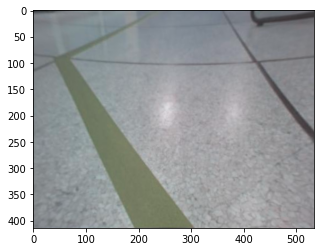

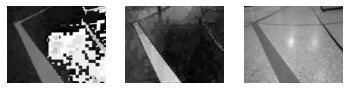

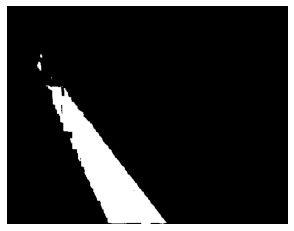

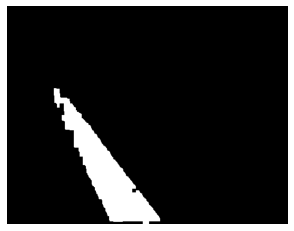

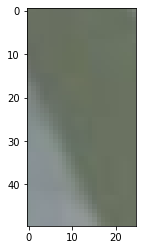

[[[106 113  98]
  [106 113  98]
  [105 112  97]
  ...
  [105 115  99]
  [113 121 109]
  [121 129 118]]

 [[105 112  97]
  [105 112  97]
  [105 112  97]
  ...
  [103 113  97]
  [107 116 103]
  [113 121 111]]

 [[105 112  97]
  [105 112  97]
  [105 112  97]
  ...
  [102 112  96]
  [104 113  99]
  [108 116 104]]

 ...

 [[137 149 149]
  [138 149 151]
  [140 149 153]
  ...
  [106 114  97]
  [106 114  97]
  [106 114  97]]

 [[137 149 149]
  [139 149 151]
  [140 149 153]
  ...
  [106 114  97]
  [107 115  98]
  [106 114  97]]

 [[138 150 151]
  [139 150 152]
  [140 149 152]
  ...
  [107 115  98]
  [107 115  98]
  [105 113  96]]]


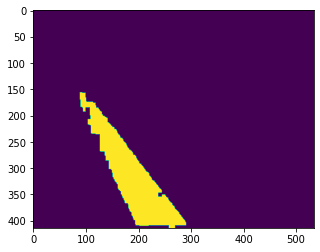

In [86]:
img=cv2.imread('image.jpg')
img=cv2.undistort(img,camera_matrix,dist_coeffs)
plt.imshow(img,cmap='brg') ; plt.show()
preprosed_img = Preprocesing( img )
plt.imshow(preprosed_img) ; plt.show()